### Fremont Bridge Bicycle Counter

In [2]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(url, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fdf2bbdf370>)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./dane/Fremont.csv', index_col = 'Date', parse_dates = True)

In [3]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [7]:
data.loc['2019-11-01': '2019-12-01']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2019-12-01 19:00:00,24.0,13.0,11.0
2019-12-01 20:00:00,15.0,6.0,9.0
2019-12-01 21:00:00,15.0,5.0,10.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147278 entries, 2019-11-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          147256 non-null  float64
 1   Fremont Bridge East Sidewalk  147256 non-null  float64
 2   Fremont Bridge West Sidewalk  147255 non-null  float64
dtypes: float64(3)
memory usage: 4.5 MB


In [25]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

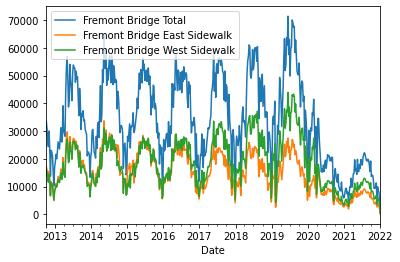

In [41]:
data.resample('w').sum().plot()

In [8]:
data.resample('w').sum()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0
...,...,...,...
2021-12-05,9951.0,3911.0,6040.0
2021-12-12,8526.0,3324.0,5202.0
2021-12-19,7826.0,3006.0,4820.0


In [17]:
data.drop('Fremont Bridge Total', axis = 1, inplace = True)

<AxesSubplot:xlabel='Date'>

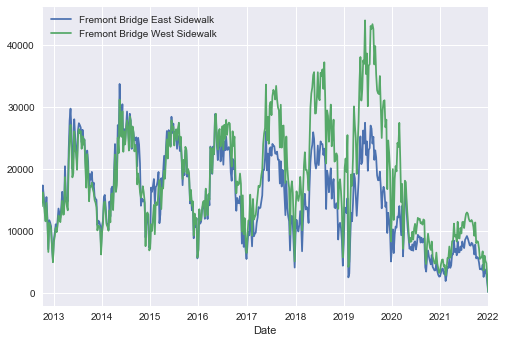

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.resample('w').sum().plot()

<AxesSubplot:xlabel='Date'>

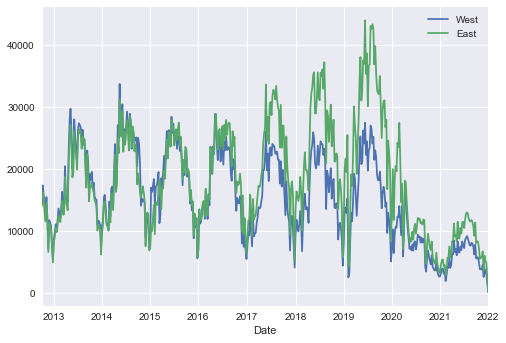

In [19]:
plt.style.use('seaborn')
data.columns = ['West', 'East']
data.resample('w').sum().plot()

In [32]:
pd.options.display.max_rows = None

<AxesSubplot:xlabel='Date'>

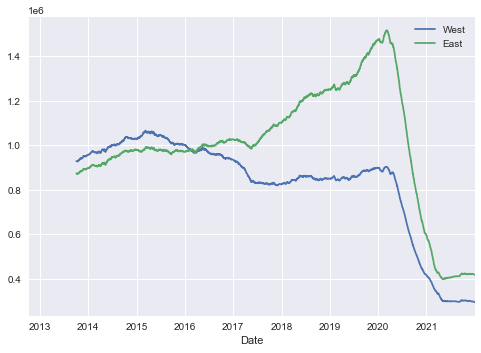

In [39]:
data.resample('D').sum().rolling(365).sum().plot()

(0.0, 2526684.75)

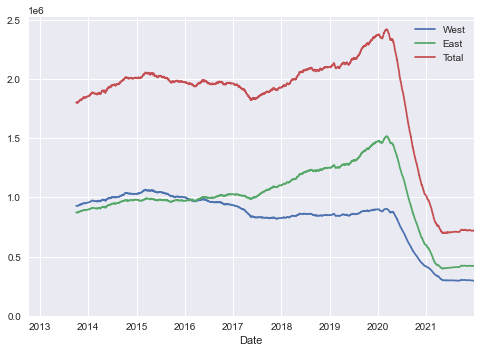

In [40]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

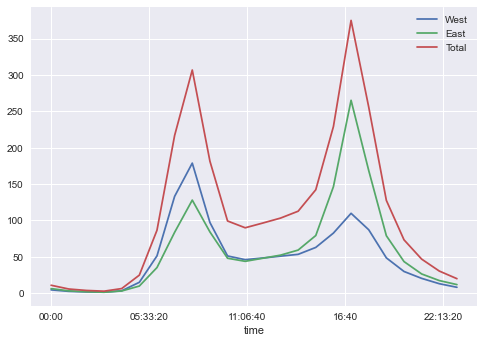

In [43]:
data.groupby(data.index.time).mean().plot()

In [44]:
pivoted = data.pivot_table('Total', index = data.index.time , columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

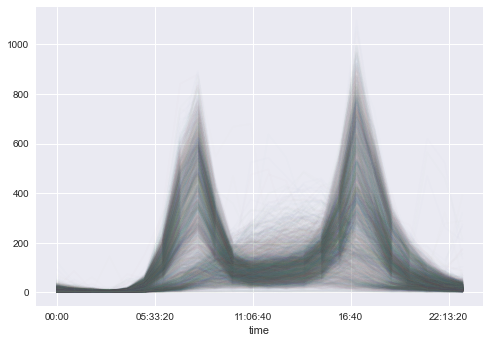

In [46]:
pivoted.plot(legend = False , alpha = 0.01)